In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('./dataset/train.csv')

In [3]:
df_train.shape

(300000, 26)

In [4]:
df_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [5]:
df_train.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'target'],
      dtype='object')

<AxesSubplot:>

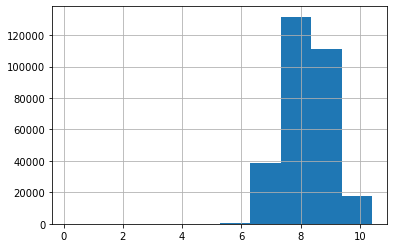

In [6]:
df_train.target.hist()

In [12]:
cat_col = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7','cat8', 'cat9']
cont_col = ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5','cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12','cont13','target']
df_1 = pd.get_dummies(df_train[cat_col],drop_first=True)
df_final_train = pd.concat([df_train.loc[:,cont_col],df_1],axis=1)

In [13]:
df_final_train.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat9_F,cat9_G,cat9_H,cat9_I,cat9_J,cat9_K,cat9_L,cat9_M,cat9_N,cat9_O
0,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,...,0,0,0,0,0,0,0,0,1,0
1,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,...,0,0,0,0,0,0,0,0,0,1
2,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,...,1,0,0,0,0,0,0,0,0,0
3,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,...,0,0,0,0,0,1,0,0,0,0
4,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,...,0,0,0,0,0,0,0,0,1,0


In [14]:
print(df_final_train.shape)
df_final_train.columns

(300000, 61)


Index(['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'target',
       'cat0_B', 'cat1_B', 'cat2_B', 'cat3_B', 'cat3_C', 'cat3_D', 'cat4_B',
       'cat4_C', 'cat4_D', 'cat5_B', 'cat5_C', 'cat5_D', 'cat6_B', 'cat6_C',
       'cat6_D', 'cat6_E', 'cat6_G', 'cat6_H', 'cat6_I', 'cat7_B', 'cat7_C',
       'cat7_D', 'cat7_E', 'cat7_F', 'cat7_G', 'cat7_I', 'cat8_B', 'cat8_C',
       'cat8_D', 'cat8_E', 'cat8_F', 'cat8_G', 'cat9_B', 'cat9_C', 'cat9_D',
       'cat9_E', 'cat9_F', 'cat9_G', 'cat9_H', 'cat9_I', 'cat9_J', 'cat9_K',
       'cat9_L', 'cat9_M', 'cat9_N', 'cat9_O'],
      dtype='object')

In [15]:
df_final_train.isnull().sum()

cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
         ..
cat9_K    0
cat9_L    0
cat9_M    0
cat9_N    0
cat9_O    0
Length: 61, dtype: int64

In [18]:
y = df_final_train['target']
X=df_final_train.drop('target',axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test , Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10,random_state=1234)
model.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=10, random_state=1234)

In [22]:
y_pred =  model.predict(X_test)
y_pred

array([8.69784129, 8.1744463 , 7.75969859, ..., 8.34459235, 8.57848341,
       8.27990228])

In [23]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test,y_pred)
rmse

0.5881699634753365

In [26]:
test_data = pd.read_csv('./dataset/test.csv')
test_data.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,B,B,B,C,B,B,A,E,E,...,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
1,5,A,B,A,C,B,C,A,E,C,...,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
2,15,B,A,A,A,B,B,A,E,D,...,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
3,16,B,B,A,C,B,D,A,E,A,...,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
4,17,B,B,A,C,B,C,A,E,C,...,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412


In [27]:
test_data.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13'],
      dtype='object')

In [34]:
test_data.isnull().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
dtype: int64

In [35]:
test_data.shape

(200000, 25)

In [28]:
cat_col = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7','cat8', 'cat9']
cont_col = ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5','cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12','cont13']
test_df = pd.get_dummies(test_data[cat_col],drop_first=True)
df_final_test = pd.concat([test_data.loc[:,cont_col],df_1],axis=1)

In [31]:
model1 = RandomForestRegressor(n_estimators=10,random_state=1234)
model1.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=1234)

In [33]:
df_final_test.isnull().sum()

cont0     100000
cont1     100000
cont2     100000
cont3     100000
cont4     100000
cont5     100000
cont6     100000
cont7     100000
cont8     100000
cont9     100000
cont10    100000
cont11    100000
cont12    100000
cont13    100000
cat0_B         0
cat1_B         0
cat2_B         0
cat3_B         0
cat3_C         0
cat3_D         0
cat4_B         0
cat4_C         0
cat4_D         0
cat5_B         0
cat5_C         0
cat5_D         0
cat6_B         0
cat6_C         0
cat6_D         0
cat6_E         0
cat6_G         0
cat6_H         0
cat6_I         0
cat7_B         0
cat7_C         0
cat7_D         0
cat7_E         0
cat7_F         0
cat7_G         0
cat7_I         0
cat8_B         0
cat8_C         0
cat8_D         0
cat8_E         0
cat8_F         0
cat8_G         0
cat9_B         0
cat9_C         0
cat9_D         0
cat9_E         0
cat9_F         0
cat9_G         0
cat9_H         0
cat9_I         0
cat9_J         0
cat9_K         0
cat9_L         0
cat9_M         0
cat9_N        

In [37]:
df_final_test.dropna(inplace=True,axis=0)

In [38]:
df_final_test.shape

(200000, 60)

In [43]:
df_final_test.columns

Index(['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cat0_B',
       'cat1_B', 'cat2_B', 'cat3_B', 'cat3_C', 'cat3_D', 'cat4_B', 'cat4_C',
       'cat4_D', 'cat5_B', 'cat5_C', 'cat5_D', 'cat6_B', 'cat6_C', 'cat6_D',
       'cat6_E', 'cat6_G', 'cat6_H', 'cat6_I', 'cat7_B', 'cat7_C', 'cat7_D',
       'cat7_E', 'cat7_F', 'cat7_G', 'cat7_I', 'cat8_B', 'cat8_C', 'cat8_D',
       'cat8_E', 'cat8_F', 'cat8_G', 'cat9_B', 'cat9_C', 'cat9_D', 'cat9_E',
       'cat9_F', 'cat9_G', 'cat9_H', 'cat9_I', 'cat9_J', 'cat9_K', 'cat9_L',
       'cat9_M', 'cat9_N', 'cat9_O'],
      dtype='object')

In [39]:
y_test_pred = model1.predict(df_final_test)

In [44]:
y_test_pred

array([8.41436398, 8.48601605, 8.70555683, ..., 8.25165748, 8.3971324 ,
       8.71441445])

In [41]:
sub = pd.read_csv('./dataset/sample_submission.csv')
sub.head()

,id,target
0,0,0.5
1,5,0.5
2,15,0.5
3,16,0.5
4,17,0.5


In [45]:
sub.target = y_test_pred

In [46]:
sub.head()

,id,target
0,0,8.414364
1,5,8.486016
2,15,8.705557
3,16,8.210365
4,17,8.434323


In [47]:
sub.to_csv('submission.csv')